/home/mi/schwtony/mcmm-project/mcmm/kmeans.py:65: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  countSize[helpme[c]] += 1
/home/mi/schwtony/mcmm-project/mcmm/kmeans.py:66: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  countMean[helpme[c]] += superData[c]


ValueError: not enough values to unpack (expected 3, got 2)

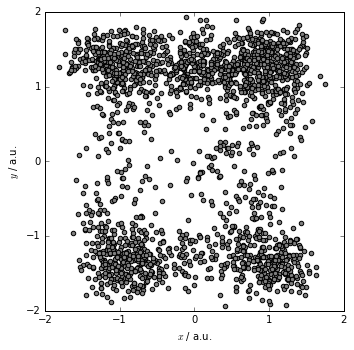

In [12]:
%matplotlib inline
import mcmm

data = mcmm.example.generate_test_data(2000,4)
rawScatter(data)
clusters = mcmm.clustering.cluster(data,2,20)
rawScatter(clusters.centers)

In [5]:
import numpy as np
import scipy.linalg as alg
import matplotlib.pyplot as plt
from msmtools.analysis import pcca as _pcca
import mcmm


def rawScatter(raw_data):

    """Shows scatterplot of data
    
    Parameters
    ----------
    raw data    : trajectories from mcmm.example.generate_test_data
    ---------- 
    
    Return
    ----------
    scatter plot: Returns one plot for 2-dimensional data. 3 plots for three dimensional data.
    ----------
    """
    
    #Format of the scatter plots
    def format_square(ax):
	    ax.set_xlim(-2, 2)
	    ax.set_ylim(-2, 2)
	    ax.set_xticks([-2, -1, 0, 1, 2])
	    ax.set_yticks([-2, -1, 0, 1, 2])
	    ax.set_xlabel(r"$x$ / a.u.")
	    ax.set_ylabel(r"$y$ / a.u.")
	    ax.set_aspect('equal')

	
    nTraj, trajLength, nDim= np.shape(raw_data)
	
    """Defines the number of plottet points in the scatter plot, nPointsPlot (500 is good)"""

    nPointsPlot = 500
    if (trajLength<nPointsPlot):
        a=1
    else: 
        a = int(trajLength/nPointsPlot)

    if (nDim==3):
        '''Scatter plot of raw data.  For 3 dimensional data, the scatter plots are for x,y x,z and y,z.'''
        fig, ax = plt.subplots(1, nDim, figsize=(nDim * 5, 5))
        for rd in raw_data:
            ax[0].scatter(rd[::a, 0], rd[::a, 1], c='grey', s=20)
            format_square(ax[0])
        for rd in raw_data:
            ax[1].scatter(rd[::a, 0], rd[::a, 1], c='grey', s=20)
            format_square(ax[1])
            ax[1].set_xlabel(r"$x$ / a.u.")
            ax[1].set_ylabel(r"$z$ / a.u.")
        for rd in raw_data:
            ax[2].scatter(rd[::a, 0], rd[::a, 1], c='grey', s=20)
            format_square(ax[2])
            ax[2].set_xlabel(r"$y$ / a.u.")
            ax[2].set_ylabel(r"$z$ / a.u.")
    else:
        fig, ax = plt.subplots(figsize=(5, 5))
        for rd in raw_data:
            ax.scatter(rd[::a, 0], rd[::a, 1], c='grey', s=20)
            format_square(ax)

    return fig.tight_layout()